# 1.图像的几何变换

In [1]:
import cv2  #opencv 读取进来为BGR格式
import matplotlib.pyplot as plt
import numpy as np

#一个魔法指令，不需要采用plt.show()显示图像
%matplotlib inline   

In [2]:
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

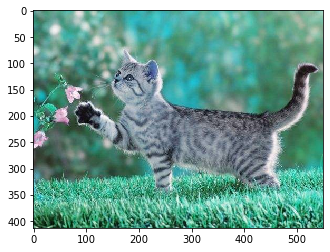

In [5]:
img = cv2.imread('images/cat.jpg')

#cv_show('cat',img)
# matplotlib显示
plt.imshow(img)


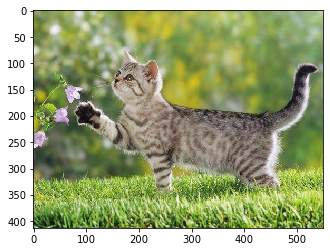

In [6]:
# OpenCV读取的图片从BGR转换为RGB
b, g, r =cv2.split(img)

img2 = cv2.merge([r,g,b])

plt.imshow(img2)

# 缩放
## 缩放只是调整图像的大小。为此，OpenCV带有一个函数cv.resize()

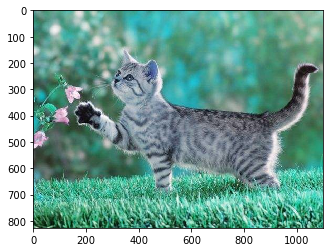

In [10]:
img = cv2.imread('images/cat.jpg')
#res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
#或者
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
plt.imshow(res)

# 平移

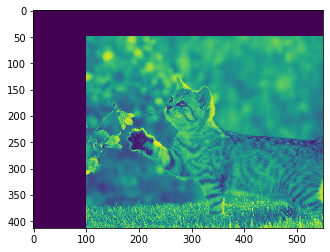

In [12]:
img = cv2.imread('images/cat.jpg',0)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

plt.imshow(dst)

# 旋转
## OpenCV提供了一个函数cv.getRotationMatrix2D

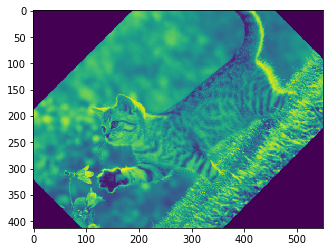

In [13]:
img = cv2.imread('images/cat.jpg',0)

rows,cols = img.shape
# cols-1 和 rows-1 是坐标限制
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),45,1)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.imshow(dst)

# 仿射变换

(<matplotlib.axes._subplots.AxesSubplot at 0x1f9652ca390>,
 Text(0.5, 1.0, 'Output'))

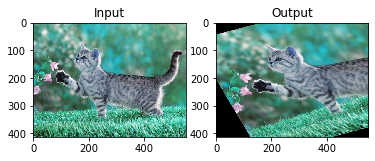

In [15]:
img = cv2.imread('images/cat.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')

# 透视变换

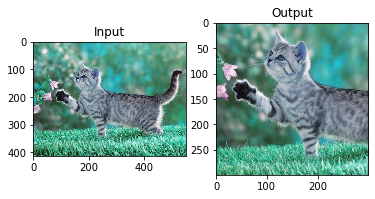

In [17]:
img = cv2.imread('images/cat.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

# 2. 图像平滑
## 2.1 2D卷积（图像过滤）

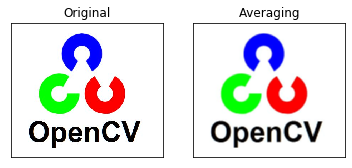

In [19]:
img = cv2.imread('images/opencv_logo.png')
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# #图像模糊（图像平滑）
## 平均 这是通过将图像与归一化框滤镜进行卷积来完成的。它仅获取内核区域下所有像素的平均值，并替换中心元素。这是通过功能**cv.blur()或**cv.boxFilter()完成的。

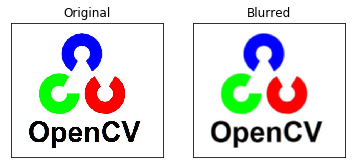

In [20]:
img = cv2.imread('images/opencv_logo.png')
blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## 2.高斯模糊

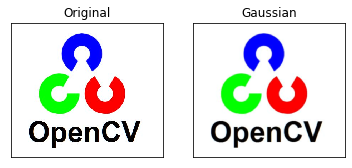

In [21]:
img = cv2.imread('images/opencv_logo.png')
blur = cv2.GaussianBlur(img,(5,5),0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(blur),plt.title('Gaussian')
plt.xticks([]), plt.yticks([])
plt.show()